# Hypothesis test
Author: Myron Kukhta (xkukht01)

### Dependency import

In [218]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Hypothesis test 1
__Task__ : *"On first-class roads, accidents with personal injury consequences were equally likely as on the highways."*  

__Method__: *Chi-squareTestd* 

### Prepare Data

Let's familiarise ourselves with the data structure and leave only the ones we are interested in. In this case:

- **p9** - Effect on:
  - `1` - health
  - `2` - own (personal impact)

- **p36** - Type of road:
  - `0` - First-class road
  - `1` - Highways  
  - Other values will be removed.

For more convenience, let's convert the data into a human-readable format.

In [219]:
# load data
df_accident = pd.read_pickle("accidents.pkl.gz")

# preprocessing
df1 = df_accident[['p36', 'p9']]
df1 = df1[(df1['p36'] == 0) | (df1['p36'] == 1)]
df1['Road type'] = df1['p36'].map({0:'highways', 1:'first class road'})
df1['With a health effect'] = (df1['p9'] == 1)

To run the test, we must transform our table into a contingency table which represent statistic relationship between type of road and health accident.


In [220]:
statistic_tab = pd.crosstab(index=df1['Road type'], columns=df1['With a health effect'])
statistic_tab

With a health effect,False,True
Road type,,
first class road,14773,7059
highways,6674,1247


### Theory and Test

*Chi-square Test* is a statistical test that relies on comparing the observed relationship between two qualitative variables in some context and the expected one and checks whether or not there is a statistical difference between them.

In our case, it is the type of road and an observation about the number of accidents in the context of their effects on human health. 

Let's declare a null hypothesis that is fully consistent with our assignment: *"On first-class roads, accidents with personal injury consequences were equally likely as on the highways."*

Significance threshold will be 0.05.

In [221]:
SIGN_THR = 0.05

# statistic test
test_statistic, p, dof, expect = stats.chi2_contingency(statistic_tab)

print(f'Test of statistic: {test_statistic}')
print(f'p-value: {p}')
print(f'Degree of freedom: {dof}')

Test of statistic: 794.1532980454858
p-value: 1.0075002730159729e-174
Degree of freedom: 1


### Analys

As we can observe, the statistical test does not exceed the expected result, indicating that the hypothesis is false and there is a clear correlation between road type and the probability of health hazard based on road type. 

In [222]:
# check truth of hypothesis
print('Fact: ', end='')
if p >= SIGN_THR:
    print('On first-class roads, accidents with personal injury consequences were EQUALLY likely as on the highways.')
else:
    print('On first-class roads, accidents with personal injury consequences were NOT EQUALLY likely as on the highways.')



Fact: On first-class roads, accidents with personal injury consequences were NOT EQUALLY likely as on the highways.


From the above comparison between real and expected data, we can observe an interesting statistic that *first-class roads are more life-threatening* than highways. This is a surprising fact to me!

In [223]:
# differents between real and expected data relationship
statistic_tab - expect

With a health effect,False,True
Road type,,
first class road,-964.266965,964.266965
highways,964.266965,-964.266965


# Hypothesis test 2
__Task__: *"Loss in trolleybus accidents is lower than in bus accidents and this difference is statistically significant"*  

__Method__: *Mann-Whitney U-Test* 

### Prepare Data

Let's familiarise ourselves with the data structure and leave only the ones we are interested in. In this case:

- **p1** - Identification number of accident.
- **p14*100** - Loss in CZ Corun.
- **p44** - Type of vehicles:
  - `8` - Bus
  - `11` - Trolleybus  
  - Other values will be removed.

For more convenience, let's convert the data into a human-readable format.

In [224]:
# load data
df_loss = pd.read_pickle("vehicles.pkl.gz")

# preprocessing
df = pd.merge(df_accident[['p1', 'p14*100']], df_loss[['p1', 'p44']], on='p1', how='inner')
df = df[ (df['p44'] == 11) | (df['p44'] == 8 ) ]
df['vehicles'] = df['p44'].map({11:'Trolleybus', 8:'Bus'})
df['loss'] = df['p14*100']
df_trolleybus = df[ df['vehicles'] == 'Trolleybus']['loss']
df_bus = df[ df['vehicles'] == 'Bus' ]['loss']

### Theory and Test

*Mann-Whitney U-Test* is a non-parametric statistical test that is used to test for differences between two independent groups based on the distribution of their values. It is used when groups of data are asymmetric or do not follow a normal distribution.

To test the statistically significant difference between two groups (in our case, types of vehicles and monetary losses in their accidents), we declare the null hypothesis, the inverse of our target hypothesis: ‘Loss in trolleybus accidents IS EQUAL than in bus accidents and this difference is statistically significant’. 

Significance threshold will be 0.05.

In [225]:
# statistic test
test_statistic, p = stats.mannwhitneyu(df_trolleybus, df_bus)

print(f'The Mann-Whitney U statistic corresponding: {test_statistic}')
print(f'p-value: {p}')

The Mann-Whitney U statistic corresponding: 467959.5
p-value: 2.471649603120307e-13


### Analys

As we can see from the test result, there is a clear difference between the two groups, which refutes the null hypothesis. It remains to determine which of the groups has a greater advantage, for this purpose I assume that we can compare the average values of financial losses.

Text(0, 0.5, 'Avg loss')

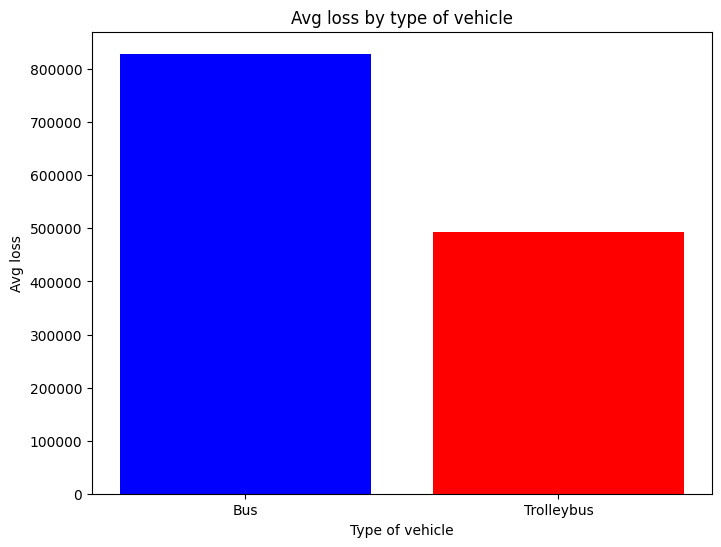

In [226]:
# plotting for better representation
df = df.groupby('vehicles')['loss'].mean().reset_index()
mean_trolleybus_loss = df.loc[df['vehicles'] == 'Trolleybus', 'loss'].values[0]
mean_bus_loss = df.loc[df['vehicles'] == 'Bus', 'loss'].values[0]

plt.figure(figsize=(8, 6))
plt.bar(df['vehicles'], df['loss'], color=['blue', 'red'])

plt.title('Avg loss by type of vehicle')
plt.xlabel('Type of vehicle')
plt.ylabel('Avg loss')

In [227]:
print('Fact: ', end='')
if p < 0.05:
    if mean_trolleybus_loss < mean_bus_loss:
        print('Loss in trolleybus accidents IS LOWER than in bus accidents and this difference is statistically significant.')
    else:
        print('Loss in trolleybus accidents IS  NO LOWER than in bus accidents and this difference is statistically significant.')
else:
    print('loss in trolleybus accidents IS EQUAL than in bus accidents and this difference is statistically significant.')

Fact: Loss in trolleybus accidents IS LOWER than in bus accidents and this difference is statistically significant
